In [1]:
# Importing the pytholog library as 'pl'.

import pytholog as pl
# import csv

In [2]:
# Dictionary defining the adjacent states for 15 states in India.
# Due to hardware constraints, only '15' states has been included in this implementation.
# Abbreviations for states in the dictionary are given in report 2, glossary.

adjSts = { # adjSts: adjacent States
    "TN": ["KE", "KA", "AP"],
    "KE": ["TN", "KA"],
    "KA": ["TN", "KE", "AP", "GO", "TE", "MA"],
    "AP": ["TN", "KA", "TE", "OD", "CH"],
    "GO": ["KA", "MA"],
    "TE": ["KA", "AP", "OD", "CH", "MA"],
    "OD": ["AP", "TE", "CH", "WB", "JH"],
    "CH": ["AP", "TE", "OD", "MA", "MP", "JH", "UP"],
    "MA": ["KA", "TE", "GO", "CH", "MP", "GU"],
    "MP": ["CH", "MA", "UP", "RA", "GU"],
    "WB": ["OD", "JH"],
    "JH": ["OD", "CH", "WB"],
    "UP": ["CH", "JH", "MP"],
    "RA": ["MP", "UP", "GU"],
    "GU": ["MA", "MP", "RA"]
}

In [4]:
# # Code for retrieving data from 'csv' file.

# adjSts = {}
# with open('countryBorders.csv', 'r') as file:
#   negihbors = csv.reader(file)
#   next(negihbors)

#   for row in negihbors:
#     if row[0] in adjSts: adjSts[row[0]].append(row[2])
#     else: adjSts[row[0]] = [row[2]]

In [3]:
# Displaying each state along with its corresponding adjacent states.
    
for st in adjSts.keys(): # st: State
    print("State:", st, ", Adjacent state(s):", adjSts[st], ", No.of Adjacent state(s):", len(adjSts[st]))

print("Total no.of states:", len(adjSts.keys()))

State: TN , Adjacent state(s): ['KE', 'KA', 'AP'] , No.of Adjacent state(s): 3
State: KE , Adjacent state(s): ['TN', 'KA'] , No.of Adjacent state(s): 2
State: KA , Adjacent state(s): ['TN', 'KE', 'AP', 'GO', 'TE', 'MA'] , No.of Adjacent state(s): 6
State: AP , Adjacent state(s): ['TN', 'KA', 'TE', 'OD', 'CH'] , No.of Adjacent state(s): 5
State: GO , Adjacent state(s): ['KA', 'MA'] , No.of Adjacent state(s): 2
State: TE , Adjacent state(s): ['KA', 'AP', 'OD', 'CH', 'MA'] , No.of Adjacent state(s): 5
State: OD , Adjacent state(s): ['AP', 'TE', 'CH', 'WB', 'JH'] , No.of Adjacent state(s): 5
State: CH , Adjacent state(s): ['AP', 'TE', 'OD', 'MA', 'MP', 'JH', 'UP'] , No.of Adjacent state(s): 7
State: MA , Adjacent state(s): ['KA', 'TE', 'GO', 'CH', 'MP', 'GU'] , No.of Adjacent state(s): 6
State: MP , Adjacent state(s): ['CH', 'MA', 'UP', 'RA', 'GU'] , No.of Adjacent state(s): 5
State: WB , Adjacent state(s): ['OD', 'JH'] , No.of Adjacent state(s): 2
State: JH , Adjacent state(s): ['OD', 'CH

In [4]:
# Initializing dictionary to store state indices, indices are 'assigned' to states.

assign = {}
i = 0
for st in adjSts.keys():
    assign[st] = i
    i += 1

print(assign)

{'TN': 0, 'KE': 1, 'KA': 2, 'AP': 3, 'GO': 4, 'TE': 5, 'OD': 6, 'CH': 7, 'MA': 8, 'MP': 9, 'WB': 10, 'JH': 11, 'UP': 12, 'RA': 13, 'GU': 14}


In [5]:
# Initializing knowledge base 'kb' and populating it with 'state' information(facts) using their assigned indices.

kb = pl.KnowledgeBase()

for st in adjSts.keys(): kb([f"State({assign[st]})"])

In [6]:
# Populating the knowledge base 'kb' with facts about 'adjacent states' using their assigned indices.

for st1 in adjSts.keys():
    if adjSts[st1] != []: # Ensuring that only states with adjacent states are considered for populating the knowledge base.
        for st2 in adjSts[st1]:
            kb([f"Adjacent({assign[st1]}, {assign[st2]})"])

In [7]:
# Initializing color assignments with descending indices and populating the knowledge base with color facts using their assigned indices.
# Here, we utilize a maximum of 4 colors, adhering to the 4-color theorem in report 2.

colors = ["red", "green", "blue", "yellow"]
i = -1
for clr in colors: # clr: color
    assign[clr] = i
    i -= 1

print(assign)
for clr in colors:
    kb([f"Color({assign[clr]})"])

{'TN': 0, 'KE': 1, 'KA': 2, 'AP': 3, 'GO': 4, 'TE': 5, 'OD': 6, 'CH': 7, 'MA': 8, 'MP': 9, 'WB': 10, 'JH': 11, 'UP': 12, 'RA': 13, 'GU': 14, 'red': -1, 'green': -2, 'blue': -3, 'yellow': -4}


In [8]:
# Asserting equality between each color and itself, and asserting inequality between each pair of distinct colors in the knowledge base.

for clr in colors:
    kb([f"ClrEq({assign[clr]}, {assign[clr]})"]) # ClrEq: Color Equals

for clr1 in colors:
    for clr2 in colors:
        if clr1 != clr2:
            kb([f"ClrNotEq({assign[clr1]}, {assign[clr2]})"]) # ClrNotEq: Color Not Equals

In [9]:
# Constructing a rule to ensure proper coloring of adjacent states in the knowledge base.

q = f"Coloring({', '.join(adjSts.keys())})" # q: query
rule = q + " :- "
noAdjEqClr = [] # noAdjEqClr: 'N'o pair of 'A'djacent states should have 'E'qual 'C'olor
for st1 in adjSts.keys():
    if adjSts[st1] != []:
        for st2 in adjSts[st1]:
            noAdjEqClr.append(f"ClrNotEq({st1}, {st2})")

rule += f"{', '.join(noAdjEqClr)}"
kb([rule]) # Updating the knowledge base with the constructed rule for proper coloring of adjacent states.
print(rule)

Coloring(TN, KE, KA, AP, GO, TE, OD, CH, MA, MP, WB, JH, UP, RA, GU) :- ClrNotEq(TN, KE), ClrNotEq(TN, KA), ClrNotEq(TN, AP), ClrNotEq(KE, TN), ClrNotEq(KE, KA), ClrNotEq(KA, TN), ClrNotEq(KA, KE), ClrNotEq(KA, AP), ClrNotEq(KA, GO), ClrNotEq(KA, TE), ClrNotEq(KA, MA), ClrNotEq(AP, TN), ClrNotEq(AP, KA), ClrNotEq(AP, TE), ClrNotEq(AP, OD), ClrNotEq(AP, CH), ClrNotEq(GO, KA), ClrNotEq(GO, MA), ClrNotEq(TE, KA), ClrNotEq(TE, AP), ClrNotEq(TE, OD), ClrNotEq(TE, CH), ClrNotEq(TE, MA), ClrNotEq(OD, AP), ClrNotEq(OD, TE), ClrNotEq(OD, CH), ClrNotEq(OD, WB), ClrNotEq(OD, JH), ClrNotEq(CH, AP), ClrNotEq(CH, TE), ClrNotEq(CH, OD), ClrNotEq(CH, MA), ClrNotEq(CH, MP), ClrNotEq(CH, JH), ClrNotEq(CH, UP), ClrNotEq(MA, KA), ClrNotEq(MA, TE), ClrNotEq(MA, GO), ClrNotEq(MA, CH), ClrNotEq(MA, MP), ClrNotEq(MA, GU), ClrNotEq(MP, CH), ClrNotEq(MP, MA), ClrNotEq(MP, UP), ClrNotEq(MP, RA), ClrNotEq(MP, GU), ClrNotEq(WB, OD), ClrNotEq(WB, JH), ClrNotEq(JH, OD), ClrNotEq(JH, CH), ClrNotEq(JH, WB), ClrNotEq(U

In [10]:
# Definining a function to retrieve the key corresponding to a given value in a dictionary.

def getKey(val, dictn): # val: value; dictn: dictionary
    val = int(val)
    for key in dictn.keys():
        if dictn[key] == val:
            return key

    return "Value not found"

In [11]:
# Printing the query and executing it against the knowledge base, then iterating through the results to find the optimal coloring solution.
# This section of the code may take approximately '30' seconds to execute the first time alone.
# import time

# startTime = time.time()

print(q, "\n")
results = kb.query(pl.Expr(q))
# endTime = time.time()
# print('Time taken:', endTime - startTime)
# print('No.of possible solutions:', len(results))
# print(len(results))
# print(results)
minClrs = 5 # minClrs: minimum no.of colors used
for res in results:
    if len(set(res.values())) < minClrs:      # Here, we utilize a set to determine the no.of distinct colors used in a coloring solution.
        print(res)                            # Printing upcoming results only if they represent a coloring solution...
        optRes = res # optRes: optimal result # ...that is more optimal than the current best solution.
        minClrs = len(set(res.values()))
        print("\nNo.of Colors used:", minClrs)
        for st in res.keys():
            print(st, ":", getKey(res[st], assign))
            kb([f"Colored({assign[st]}, {res[st]})"]) # Records the coloring of states with their respective colors in the knowledge base.

Coloring(TN, KE, KA, AP, GO, TE, OD, CH, MA, MP, WB, JH, UP, RA, GU) 

{'TN': '-1', 'KE': '-2', 'KA': '-3', 'AP': '-2', 'GO': '-1', 'TE': '-1', 'OD': '-3', 'CH': '-4', 'MA': '-2', 'MP': '-1', 'WB': '-1', 'JH': '-2', 'UP': '-3', 'RA': '-2', 'GU': '-3'}

No.of Colors used: 4
TN : red
KE : green
KA : blue
AP : green
GO : red
TE : red
OD : blue
CH : yellow
MA : green
MP : red
WB : red
JH : green
UP : blue
RA : green
GU : blue


In [12]:
# Defining a rule in the knowledge base to determine whether a state is colored or not.

kb(["StClrd(X) :- State(X), Color(C), Colored(X, C)"]) # SrClrd: State is Colored

In [13]:
# Defining a function to check if every state in the knowledge base is colored exactly once.

def checkOnlyOneClr(kb): # check if each state has Only One Color associated with them.
    results = kb.query(pl.Expr("StClrd(X)"))
    print(results)
    stStfy = [int(result['X']) for result in results] # stStfy: states that satisfy
    stStfy.sort()
    print("States satifying the logic:", stStfy)
    
    stAll = [int(f"{assign[st]}") for st in adjSts.keys()] # stAll: all states
    print("All States                :", stAll)

    return stStfy == stAll

if checkOnlyOneClr(kb): print("Valid") # if all given states have exactly one color associated with them.

[{'X': '0'}, {'X': '1'}, {'X': '10'}, {'X': '11'}, {'X': '12'}, {'X': '13'}, {'X': '14'}, {'X': '2'}, {'X': '3'}, {'X': '4'}, {'X': '5'}, {'X': '6'}, {'X': '7'}, {'X': '8'}, {'X': '9'}]
States satifying the logic: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
All States                : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Valid


In [14]:
# Defining a rule in the knowledge base to determine if adjacent states 'share the same color',
# which is 'opposite' to adjacent states 'not having the same color'.

# AdjSameClr: Adjacent states share the Same Color
kb(["AdjSameClr(X, Y) :- State(X), State(Y), Adjacent(X, Y), Color(C1), Color(C2), Colored(X, C1), Colored(Y, C2), ClrEq(C1, C2)"])

In [15]:
# Defining a function to check if adjacent states 'have the same color', and validates the coloring 'if they do not'.

def checkAdjSameClr(kb): # checks if Adjacent states share the Same Color.
    results = kb.query(pl.Expr("AdjSameClr(X, Y)"))
    print(results)
    return results[0] # Returns the first result from the query, which is 'No' if no states satisfy the query... 
                      # ...indicating that adjacent states do not have the same color.
if checkAdjSameClr(kb) == 'No': print("Valid") # if all pairs of states do not share the same color.

['No']
Valid


In [16]:
# Printing the optimal coloring solution and converting the color 'indices' back to 'names' for clarity.

print(optRes)

for st in optRes:
    optRes[st] = getKey(optRes[st], assign)

print(optRes)

{'TN': '-1', 'KE': '-2', 'KA': '-3', 'AP': '-2', 'GO': '-1', 'TE': '-1', 'OD': '-3', 'CH': '-4', 'MA': '-2', 'MP': '-1', 'WB': '-1', 'JH': '-2', 'UP': '-3', 'RA': '-2', 'GU': '-3'}
{'TN': 'red', 'KE': 'green', 'KA': 'blue', 'AP': 'green', 'GO': 'red', 'TE': 'red', 'OD': 'blue', 'CH': 'yellow', 'MA': 'green', 'MP': 'red', 'WB': 'red', 'JH': 'green', 'UP': 'blue', 'RA': 'green', 'GU': 'blue'}


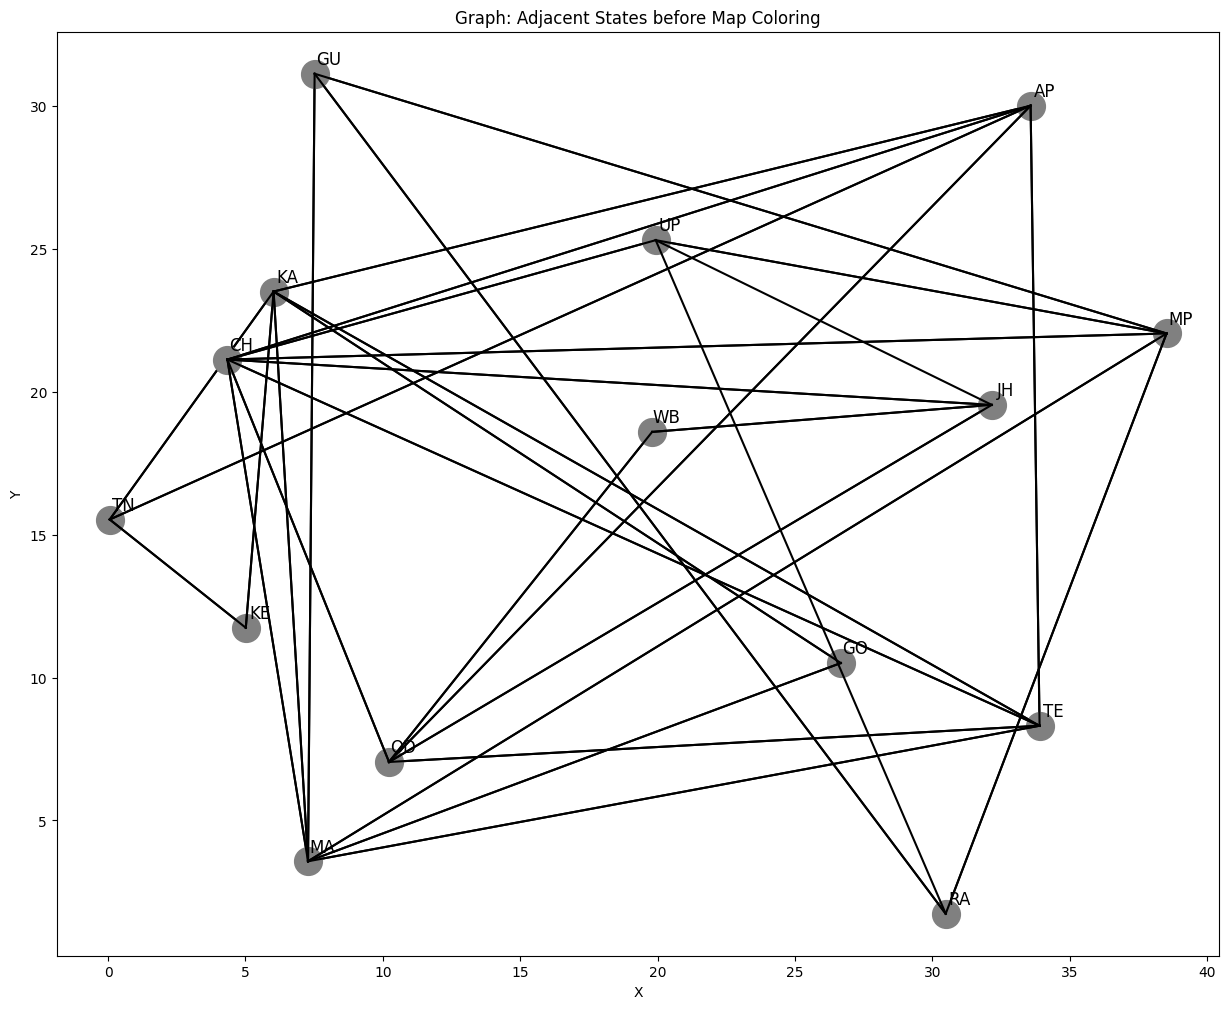

In [17]:
# Ploting the graph of adjacent states before map coloring,...
# ...with states represented by gray circles and connections between adjacent states shown in black lines.

import matplotlib.pyplot as plt # for graph plotting.
import random # for randomly selecting coordinates for states.

# Selecting random coordinates uniformly to position the states on the graph.
stCrdnts = {st: (random.uniform(0, 40), random.uniform(0, 40)) for st in optRes.keys()} # stCrdnts: state coordinates

plt.figure(figsize=(15, 12)) # Set the size of the figure to 15x12 units.

for st, clr in optRes.items():
    x, y = stCrdnts[st]
    plt.plot(x, y, 'o', markersize=20, color='gray') # Plots a 'gray' circle ('o') at the coordinates (x, y) with a size of '20' units.
    
    for adjSt in adjSts[st]: # adjSt: adjacent state
        adjX, adjY = stCrdnts[adjSt]
        plt.plot([x, adjX], [y, adjY], color='black') # Draws a 'black' line connecting the points (x, y) and (adjX, adjY)...
                                                      # ...to represent adjacency between states.
for st, (x, y) in stCrdnts.items():
    plt.text(x + 0.5, y + 0.5, st, fontsize=12, ha='center', va='center') # Adds text labels for each state at coordinates (x + 0.5, y + 0.5), 
                                                                          # with font size '12', 'centered horizontally and vertically'.

plt.title('Graph: Adjacent States before Map Coloring')
plt.xlabel('X')
plt.ylabel('Y')

# plt.grid(True)
plt.show() # Displays the plotted graph.

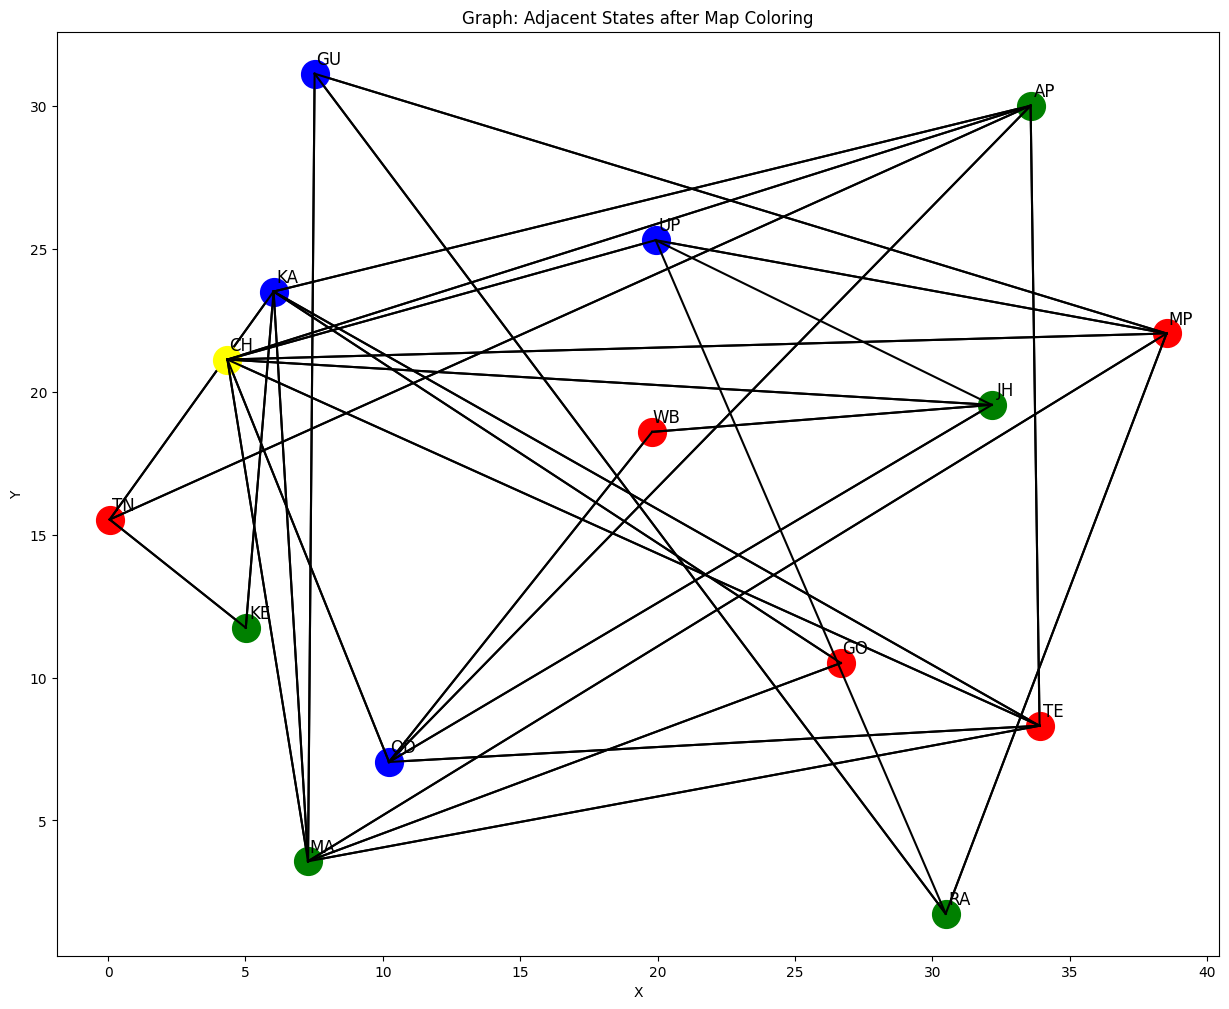

In [18]:
# Plotting the graph of adjacent states after map coloring, 
# where each state is represented by a colored circle according to its assigned color. 
# Additionally, connections between adjacent states are depicted with black lines.

plt.figure(figsize=(15, 12))

for st, clr in optRes.items():
    x, y = stCrdnts[st]
    plt.plot(x, y, 'o', markersize=20, color=clr) # plots a circle ('o') at the specified coordinates (x, y) with a size of '20' units, 
                                                  # and the color of the circle is determined by the variable 'clr'.
    for adjSt in adjSts[st]:
        adjX, adjY = stCrdnts[adjSt]
        plt.plot([x, adjX], [y, adjY], color='black')

for st, (x, y) in stCrdnts.items():
    plt.text(x + 0.5, y + 0.5, st, fontsize=12, ha='center', va='center')

plt.title('Graph: Adjacent States after Map Coloring')
plt.xlabel('X')
plt.ylabel('Y')

# plt.grid(True)
plt.show()

In [20]:
# # Backtracking
# import time

# class MapColoring:
#     def __init__(self, graph, colors):
#         self.graph = graph
#         self.colors = colors

#     def is_safe(self, vertex, color, color_map):
#         for neighbor in self.graph[vertex]:
#             if color_map.get(neighbor) == color:
#                 return False
#         return True

#     def color_map(self, vertex_index, color_map, solutions):
#         vertices = list(self.graph.keys())
#         if vertex_index == len(vertices):
#             solutions.append(color_map.copy())
#             return

#         vertex = vertices[vertex_index]

#         for color in self.colors:
#             if self.is_safe(vertex, color, color_map):
#                 color_map[vertex] = color

#                 self.color_map(vertex_index + 1, color_map, solutions)

#                 color_map[vertex] = None

#     def solve(self):
#         solutions = []
#         self.color_map(0, {}, solutions)
#         return solutions

# if __name__ == "__main__":    
#     adjSts = { # adjSts: adjacent States
#     "TN": ["KE", "KA", "AP"],
#     "KE": ["TN", "KA"],
#     "KA": ["TN", "KE", "AP", "GO", "TE", "MA"],
#     "AP": ["TN", "KA", "TE", "OD", "CH"],
#     "GO": ["KA", "MA"],
#     "TE": ["KA", "AP", "OD", "CH", "MA"],
#     "OD": ["AP", "TE", "CH", "WB", "JH"],
#     "CH": ["AP", "TE", "OD", "MA", "MP", "JH", "UP"],
#     "MA": ["KA", "TE", "GO", "CH", "MP", "GU"],
#     "MP": ["CH", "MA", "UP", "RA", "GU"],
#     "WB": ["OD", "JH"],
#     "JH": ["OD", "CH", "WB"],
#     "UP": ["CH", "JH", "MP"],
#     "RA": ["MP", "UP", "GU"],
#     "GU": ["MA", "MP", "RA"]
#     }

#     colors = ['Red', 'Green', 'Blue','Yellow']

#     start_time = time.time()
    
#     map_coloring = MapColoring(adjSts, colors)
#     solutions = map_coloring.solve()
    
#     end_time = time.time()
  
#     execution_time = end_time - start_time
    
#     print('Time taken:', execution_time)
#     print('No.of possible solutions:', len(solutions))
#     print(solutions[0])

Time taken: 0.10090327262878418
No.of possible solutions: 15360
{'TN': 'Red', 'KE': 'Green', 'KA': 'Blue', 'AP': 'Green', 'GO': 'Red', 'TE': 'Red', 'OD': 'Blue', 'CH': 'Yellow', 'MA': 'Green', 'MP': 'Red', 'WB': 'Red', 'JH': 'Green', 'UP': 'Blue', 'RA': 'Green', 'GU': 'Blue'}


In [ ]:
# # Data set
# adjSts = {"Andhra Pradesh": ["Telangana", "Karnataka", "Tamil Nadu", "Odisha", "Chhattisgarh"],
#              "Arunachal Pradesh": ["Assam", "Nagaland"],
#              "Assam": ["Arunachal Pradesh", "Nagaland", "Manipur", "Mizoram", "Meghalaya", "Tripura", "West Bengal"],
#              "Bihar": ["Uttar Pradesh", "Jharkhand", "West Bengal"],
#              "Chhattisgarh": ["Madhya Pradesh", "Maharashtra", "Telangana", "Odisha", "Jharkhand", "Uttar Pradesh"],
#              "Goa": ["Maharashtra", "Karnataka"],
#              "Gujarat": ["Rajasthan", "Madhya Pradesh", "Maharashtra"],
#              "Haryana": ["Punjab", "Himachal Pradesh", "Rajasthan", "Uttar Pradesh"],
#              "Himachal Pradesh": ["Punjab", "Haryana", "Uttarakhand"],
#              "Jharkhand": ["Bihar", "West Bengal", "Odisha", "Chhattisgarh"],
#              "Karnataka": ["Maharashtra", "Goa", "Tamil Nadu", "Andhra Pradesh", "Telangana", "Kerala"],
#              "Kerala": ["Tamil Nadu", "Karnataka"],
#              "Madhya Pradesh": ["Rajasthan", "Uttar Pradesh", "Chhattisgarh", "Maharashtra", "Gujarat", "Jharkhand"],
#              "Maharashtra": ["Gujarat", "Madhya Pradesh", "Chhattisgarh", "Telangana", "Karnataka", "Goa"],
#              "Manipur": ["Nagaland", "Assam", "Mizoram"],
#              "Meghalaya": ["Assam"],
#              "Mizoram": ["Tripura", "Assam", "Manipur"], 
#              "Nagaland": ["Assam", "Arunachal Pradesh", "Manipur"], 
#              "Odisha": ["Jharkhand", "Chhattisgarh", "Andhra Pradesh", "Telangana", "West Bengal"],
#              "Punjab": ["Himachal Pradesh", "Haryana", "Rajasthan"],
#              "Rajasthan": ["Punjab", "Haryana", "Uttar Pradesh", "Madhya Pradesh", "Gujarat"],
#              "Sikkim": ["West Bengal"],
#              "Tamil Nadu": ["Kerala", "Karnataka", "Andhra Pradesh"],
#              "Telangana": ["Maharashtra", "Chhattisgarh", "Andhra Pradesh", "Karnataka", "Odisha"],
#              "Tripura": ["Mizoram", "Assam"],
#              "Uttar Pradesh": ["Uttarakhand", "Himachal Pradesh", "Haryana", "Rajasthan", "Madhya Pradesh", "Bihar"],
#              "Uttarakhand": ["Himachal Pradesh", "Uttar Pradesh"],
#              "West Bengal": ["Sikkim", "Assam", "Jharkhand", "Bihar", "Odisha"]}

In [ ]:
# # Data set
# adjSts = {"AP": ["TE", "KA", "TN", "OD", "CH"],
#              "AR": ["AS", "NA"],
#              "AS": ["AR", "NA", "MN", "MI", "ME", "TR", "WB"],
#              "BI": ["UP", "JH", "WB"],
#              "CH": ["MP", "MA", "TE", "OD", "JH", "UP"],
#              "GO": ["MA", "KA"],
#              "GU": ["RA", "MP", "MA"],
#              "HA": ["PU", "HP", "RA", "UP"],
#              "HP": ["PU", "HA", "UT"],
#              "JH": ["BI", "WB", "OD", "CH"],
#              "KA": ["MA", "GO", "TN", "AP", "TE", "KE"],
#              "KE": ["TN", "KA"],
#              "MP": ["RA", "UP", "CH", "MA", "GU", "JH"],
#              "MA": ["GU", "MP", "CH", "TE", "KA", "GO"],
#              "MN": ["NA", "AS", "MI"],
#              "ME": ["AS"],
#              "MI": ["TR", "AS", "MN"], 
#              "NA": ["AS", "AR", "MN"], 
#              "OD": ["JH", "CH", "AP", "TE", "WB"],
#              "PU": ["HP", "HA", "RA"],
#              "RA": ["PU", "HA", "UP", "MP", "GU"],
#              "SI": ["WB"],
#              "TN": ["KE", "KA", "AP"],
#              "TE": ["MA", "CH", "AP", "KA", "OD"],
#              "TR": ["MI", "AS"],
#              "UP": ["UT", "HP", "HA", "RA", "MP", "BI"],
#              "UT": ["HP", "UP"],
#              "WB": ["SI", "AS", "JH", "BI", "OD"]}